### Insurance Claims- Fraud Detection

### Importing Library

In [2]:
#data lib
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

#save

import warnings
warnings.filterwarnings('ignore')
import pickle

### Data Loading

In [3]:
pd.set_option('max_columns',40)
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv',skipinitialspace=True)
data    

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


### Data Overview

In [4]:
data.shape

(1000, 40)

In [5]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy_number & incident_location have unique features for identifications and 1 more feature _c39 which have no data. so lets remove these features.

In [6]:
data.drop(columns=['policy_number','incident_location','_c39'],inplace=True)

In [7]:
#insured zip is part of address so it will also not help in model. so removing it as well.

data.drop(columns=['insured_zip'],inplace=True)

### Duplicacy Test

In [8]:
data.duplicated().sum()

0

No duplicacy in dataset.

### Null Testing

In [9]:
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

dataset have no null values in any feature.

### Non-numeric features encoding

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

we have 2 date features, first of all lets convert these features.

In [11]:
data['policy_bind_date']=data['policy_bind_date'].astype('datetime64')
data['incident_date']=data['incident_date'].astype('datetime64')

In [12]:
data['policy_bind_date.dt']=data['policy_bind_date'].dt.day
data['policy_bind_date.month']=data['policy_bind_date'].dt.month
data['policy_bind_date.year']=data['policy_bind_date'].dt.year

In [13]:
data['incident_date.dt']=data['incident_date'].dt.day
data['incident_date.month']=data['incident_date'].dt.month
data['incident_date.year']=data['incident_date'].dt.year

In [14]:
data.drop(columns=['incident_date','policy_bind_date'],inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [16]:
data['incident_date.year'].value_counts()

2015    1000
Name: incident_date.year, dtype: int64

In [17]:
# as all incidents happened in same year so no need to keep this feature in data.
del data['incident_date.year']

In [18]:
for col in data.columns:
    if data[col].dtypes=='object':
        print(col)

policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
property_damage
police_report_available
auto_make
auto_model
fraud_reported


#### We have many text features, will verify one by one & convert them as numeric type.

In [19]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [20]:
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [21]:
#csl have 2 instance per person & total so spiliting it in 2 features.
data['csl_per_person']=data['policy_csl'].apply(lambda x:x.split('/')[0])
data['csl_total']=data['policy_csl'].apply(lambda x:x.split('/')[1])

In [22]:
data['csl_per_person']=data['csl_per_person'].astype('int')
data['csl_total']=data['csl_total'].astype('int')

In [23]:
#removing main feature as already extracted data from it.
del data['policy_csl']

In [24]:
data['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [25]:
#binary classification so converting in 1,0
data['insured_sex']=data['insured_sex'].map({'FEMALE':0,'MALE':1})

In [26]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [27]:
#ordinal data so encoding accordingly.
data['insured_education_level']=data['insured_education_level'].map({'High School':0,'Associate':1,'College':2,'Masters':3,'JD':4,'MD':5,'PhD':6})

In [28]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [29]:
data['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [30]:
#i dont think so hobby have any relation with fraud so removing it.

del data['insured_hobbies']

In [31]:
data['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [32]:
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [33]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [34]:
#Around 20 % values are missing in collision_type so we cant impute these many values. so removing this feature.

del data['collision_type']

In [35]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [36]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [37]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [38]:
data['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [39]:
#As we have city/state features so for now i am removing 1 feature out of it.
del data['incident_city']

In [40]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [41]:
#%36 values are missing in property damage feature moreover we have very less data so cant afford data loss instead removing this feature from dataset.

del data['property_damage']

In [42]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [43]:
#I think police report is very important feature but which missing 35% values.. we cant impute this much value of any features. so removing this feature.
del data['police_report_available']

In [44]:
data['auto_make'].value_counts()

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [45]:
data['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
95                27
F150              27
E400              27
Grand Cherokee    25
93                25
Maxima            24
Tahoe             24
Escape            24
Ultima            23
X5                23
Silverado         22
Civic             22
Highlander        22
Fusion            21
TL                20
CRV               20
Impreza           20
ML350             20
Corolla           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [46]:
#nothing to do with auto model so removing it.

del data['auto_model']

In [47]:
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [48]:
#its our target so converting it in 1,0
data.fraud_reported=data.fraud_reported.map({'N':0,'Y':1})

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int64  
 7   insured_education_level      1000 non-null   int64  
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  incident_severity  

In [50]:
for col in data.columns:
    if data[col].dtypes=='object':
        print(col)

policy_state
insured_occupation
insured_relationship
incident_type
incident_severity
authorities_contacted
incident_state
auto_make


Encoding rest of the features using one hot.

In [51]:
data=pd.get_dummies(data,['policy_state',
'insured_occupation',
'insured_relationship',
'incident_type',
'incident_severity',
'authorities_contacted',
'incident_state',
'auto_make'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   policy_annual_premium                   1000 non-null   float64
 4   umbrella_limit                          1000 non-null   int64  
 5   insured_sex                             1000 non-null   int64  
 6   insured_education_level                 1000 non-null   int64  
 7   capital-gains                           1000 non-null   int64  
 8   capital-loss                            1000 non-null   int64  
 9   incident_hour_of_the_day                1000 non-null   int64  
 10  number_of_vehicles_involved             1000 non-null   int64

data set cleaned now no null value & all features are numeric.

### Describe

In [53]:
pd.set_option('max_columns',84)
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_date.dt,policy_bind_date.month,policy_bind_date.year,incident_date.dt,incident_date.month,csl_per_person,csl_total,policy_state_IL,policy_state_IN,policy_state_OH,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,0.463000,2.932000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,15.448000,6.559000,2001.604000,13.08400,3.407000,272.650000,580.200000,0.338000,0.310000,0.352000,0.065000,0.069000,0.074000,0.076000,0.053000,0.054000,0.093000,0.071000,0.071000,0.085000,0.063000,0.076000,0.078000,0.072000,0.170000,0.174000,0.17700,0.18300,0.141000,0.155000,0.419000,0.084000,0.403000,0.094000,0.27600,0.354000,0.280000,0.090000,0.196000,0.223000,0.091000,0.198000,0.29200,0.110000,0.262000,0.023000,0.030000,0.248000,0.110000,0.217000,0.068000,0.069000,0.072000,0.076000,0.080000,0.072000,0.055000,0.067000,0.065000,0.078000,0.080000,0.080000,0.070000,0.068000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,0.498879,2.000845,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,8.850176,3.391758,7.360391,10.44318,3.276291,161.603196,287.420547,0.473265,0.462725,0.477833,0.246649,0.253

data looks normal with equal value count.
in feature 'umbrella_limit' 1 negative value is there which seems an outlier so we will remove it.

In [54]:
data.drop(data[data['umbrella_limit']<.0].index,inplace=True)

### Feature selection

In [55]:
from sklearn.feature_selection import SelectKBest,f_classif

In [56]:
X=data.drop(columns=['fraud_reported'])
y=data.fraud_reported

In [57]:
pd.set_option('max_rows',85)
# find out score of each feature using k best
best_feature=SelectKBest(score_func=f_classif)
fit=best_feature.fit(X,y)

scores=pd.DataFrame(fit.scores_)
scores['feature_name']=X.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False).reset_index()

,index,score,column_name
0,52,358.597824,incident_severity_Major Damage
1,53,61.069682,incident_severity_Minor Damage
2,54,30.273015,incident_severity_Total Loss
3,16,30.114586,vehicle_claim
4,13,27.826902,total_claim_amount
5,15,19.728288,property_claim
6,58,17.967288,authorities_contacted_None
7,55,17.600787,incident_severity_Trivial Damage
8,51,14.845493,incident_type_Vehicle Theft
9,49,11.494428,incident_type_Parked Car


In [58]:
New_X=data[scores.nlargest(50,'score').column_name]

In [59]:
New_X.shape

(999, 50)

In [60]:
y.shape

(999,)

In [61]:
data=pd.concat([New_X,y],axis=1)

### Heatmap-Correlation & Multicollinearity

<AxesSubplot:>

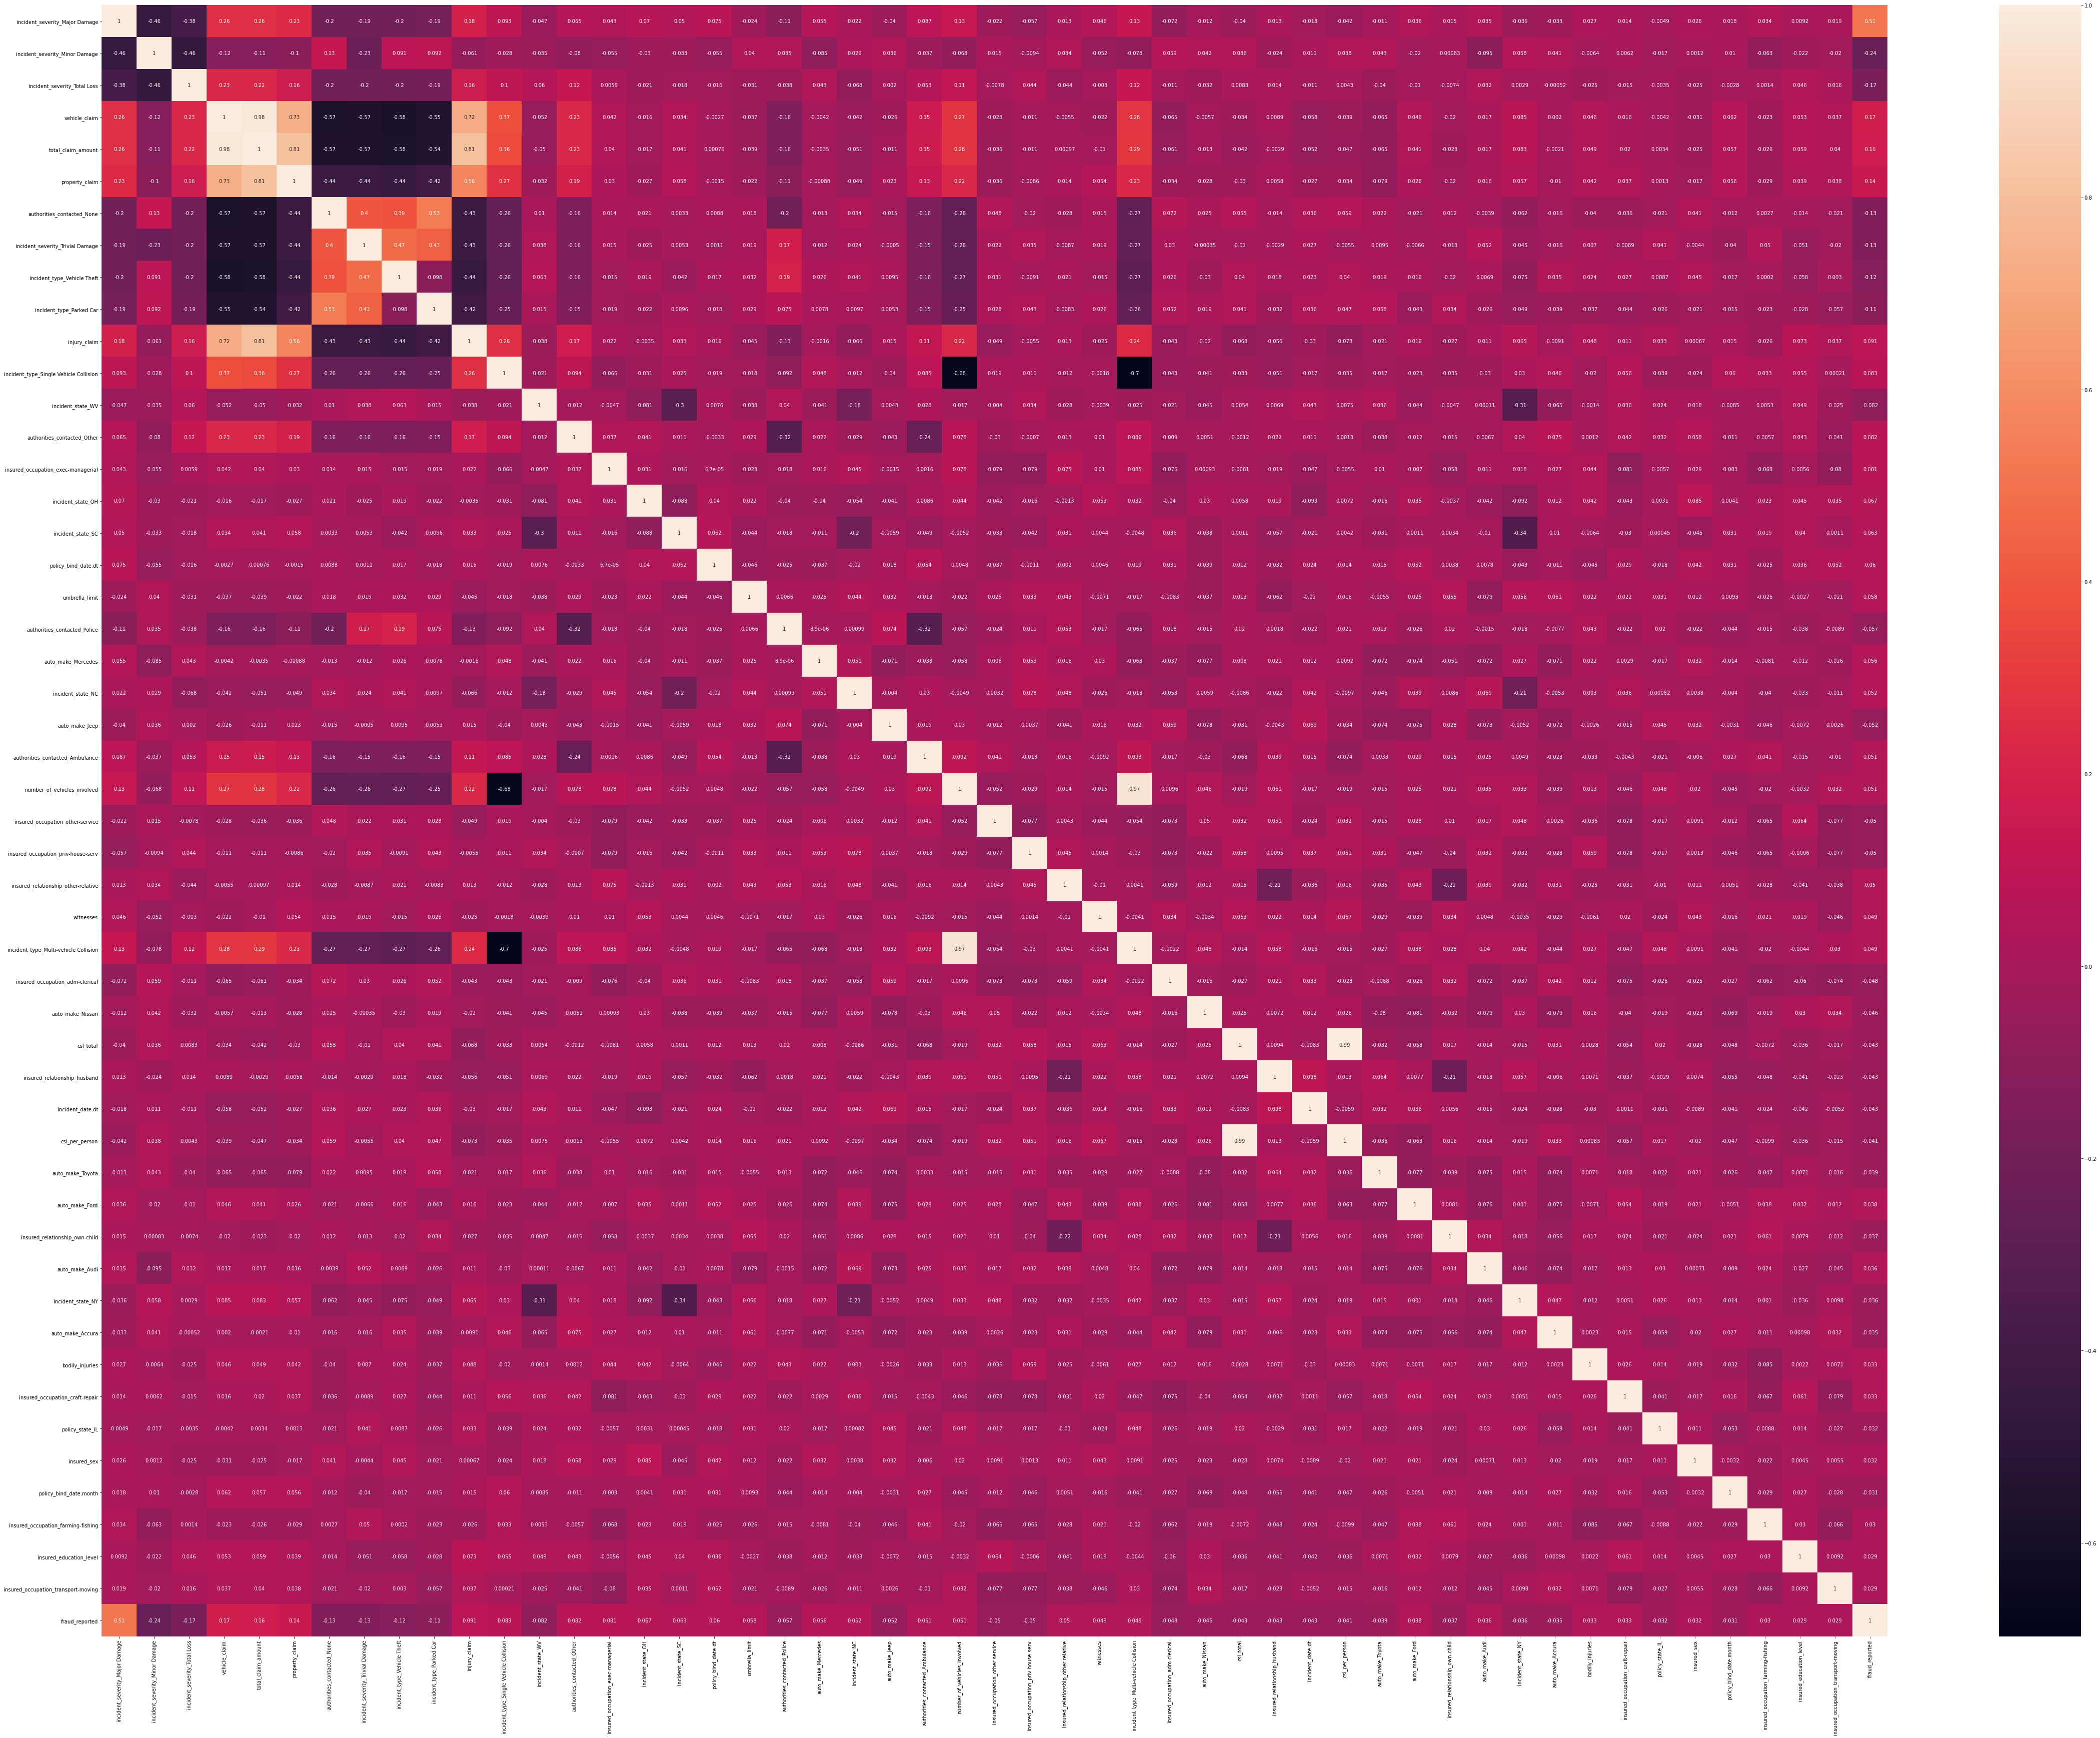

In [62]:
plt.figure(figsize=(80,60))

sns.heatmap(data.corr(),annot=True)

In [63]:
data.corrwith(data['fraud_reported'])

incident_severity_Major Damage            0.514326
incident_severity_Minor Damage           -0.240246
incident_severity_Total Loss             -0.171666
vehicle_claim                             0.171230
total_claim_amount                        0.164781
property_claim                            0.139297
authorities_contacted_None               -0.133050
incident_severity_Trivial Damage         -0.131710
incident_type_Vehicle Theft              -0.121127
incident_type_Parked Car                 -0.106760
injury_claim                              0.091124
incident_type_Single Vehicle Collision    0.083307
incident_state_WV                        -0.082450
authorities_contacted_Other               0.081749
insured_occupation_exec-managerial        0.080598
incident_state_OH                         0.066731
incident_state_SC                         0.062749
policy_bind_date.dt                       0.060017
umbrella_limit                            0.058131
authorities_contacted_Police   

### VIF-Multicollinearity Test

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
X=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

In [66]:
#scaling
scaler=StandardScaler()

x_scaled=scaler.fit_transform(X)

In [67]:
#multicollinearity

vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif["features"]=X.columns

vif

,vif,features
0,inf,incident_severity_Major Damage
1,inf,incident_severity_Minor Damage
2,inf,incident_severity_Total Loss
3,inf,vehicle_claim
4,inf,total_claim_amount
5,inf,property_claim
6,2.789017,authorities_contacted_None
7,inf,incident_severity_Trivial Damage
8,inf,incident_type_Vehicle Theft
9,inf,incident_type_Parked Car


In [72]:
new_data=pd.concat([X,y],axis=1)

In [75]:
new_data.drop(columns=['csl_per_person','number_of_vehicles_involved','vehicle_claim'],inplace=True)

In [76]:
new_data.shape

(999, 48)

### Skewness Testing

In [123]:
new_data.skew()

incident_severity_Major Damage            1.007775
incident_severity_Minor Damage            0.609908
incident_severity_Total Loss              0.979882
total_claim_amount                       -0.595646
property_claim                            0.378121
authorities_contacted_None                2.846501
incident_severity_Trivial Damage          2.867699
incident_type_Vehicle Theft               2.784745
incident_type_Parked Car                  3.001952
injury_claim                              0.265382
incident_type_Single Vehicle Collision    0.398646
incident_state_WV                         1.373625
authorities_contacted_Other               1.516426
insured_occupation_exec-managerial        3.202791
incident_state_OH                         6.370257
incident_state_SC                         1.167280
policy_bind_date.dt                       0.022511
umbrella_limit                            1.806100
authorities_contacted_Police              0.914745
auto_make_Mercedes             

most of the features which are showing skewness are dummy variables. so keeping them as its.

### Class Imbalnce Test

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

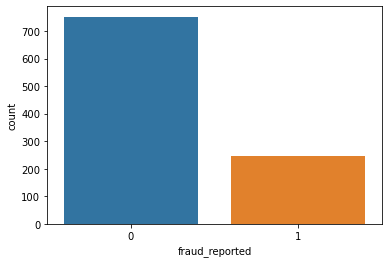

In [77]:
sns.countplot(new_data.fraud_reported)

Class imbalancing clearly shown there. lets use resample to balance class.

In [78]:
from sklearn.utils import resample

In [79]:
data0=new_data[new_data['fraud_reported']==0]
data1=new_data[new_data['fraud_reported']==1]

In [80]:
upsample=resample(data1,n_samples=700,random_state=91)
bal_data=pd.concat([upsample,data0],axis=0)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

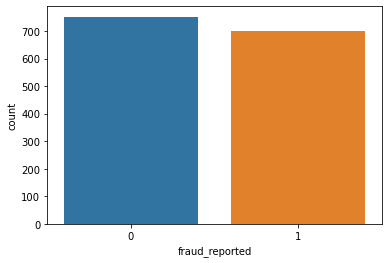

In [82]:
sns.countplot(bal_data.fraud_reported)

both classes are well balanced now. we can proceed for model building.

### Split Dataset

In [83]:
X=bal_data.drop(columns=['fraud_reported'])
y=bal_data.fraud_reported

scaler=StandardScaler()
x_scale=scaler.fit_transform(X)

### Train Test Split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=91)

### Model Building

In [85]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
svc=SVC()
gbc=GradientBoostingClassifier()

In [86]:
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
svc.fit(x_train,y_train)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

### Evaluation

In [87]:
#training score
print(lr.score(x_train,y_train)*100)
print(rfc.score(x_train,y_train)*100)
print(svc.score(x_train,y_train)*100)
print(gbc.score(x_train,y_train)*100)

78.78787878787878
100.0
89.25619834710744
91.73553719008265


In [88]:
#lr score

y_pred=lr.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7382920110192838


In [89]:
#rfc score

y_pred=rfc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.90633608815427


In [90]:
#svc score

y_pred=svc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8292011019283747


In [91]:
#gbc score

y_pred=gbc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8236914600550964


In [92]:
from sklearn.model_selection import cross_val_score

In [94]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scale,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfc,x_scale,y))*100)

print('Gradient Boost score:',np.mean(cross_val_score(gbc,x_scale,y))*100)

print('svc score:',np.mean(cross_val_score(svc,x_scale,y))*100)

Logistic Regression score: 75.48216613342814
Random Forest score: 90.70292688707194
Gradient Boost score: 83.95402298850576
svc score: 84.57447564877356


#### Random Forest scoring same on test & cross validation with around 91% accuracy. its well generalized model. so we will go with it.

In [95]:
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       194
           1       0.84      0.98      0.91       169

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.92      0.91      0.91       363



### Hyper Parameter Tunning

In [96]:
params={'n_estimators':[70,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2],
        'min_samples_leaf':[2,3],
        'max_depth':[10,20]        
        
    
}

grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 70}

In [109]:
rfc=RandomForestClassifier(criterion= 'entropy',
 max_depth= 52,
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 82)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

89.53168044077135 67


Tried parameter tunning but getting almost same score which we got with default paramaters.

### ROC AUC

In [111]:
from sklearn.metrics import plot_roc_curve

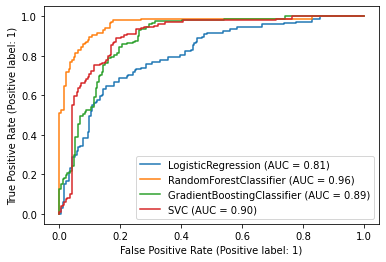

In [112]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

In ROC curve as well we are getting highest score with Random forest i.e. 0.96.

### Final Scoring

In [121]:
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred))
print('\n F1 score \n',f1_score(y_test,y_pred)*100)
print('\n Classification Report \n',classification_report(y_test,y_pred))

Confusion Matrix 
 [[161  33]
 [  5 164]]

 F1 score 
 89.61748633879782

 Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       194
           1       0.83      0.97      0.90       169

    accuracy                           0.90       363
   macro avg       0.90      0.90      0.90       363
weighted avg       0.91      0.90      0.90       363



### Model Save

In [122]:
filename='Fraud_detection.pickle'
pickle.dump(rfc,open(filename,'wb'))